In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data into dataframe
df = pd.read_csv('loan.csv')

## Data Understanding:

### a) Reading and understanding the data 

In [3]:
# Read the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# size of the data
df.shape

(39717, 111)

#### * There are 39717 rows and 111 columns

In [5]:
#Checking for null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# checking for percentage of null values
round(100*df.isnull().mean(),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [7]:
# printing the columns with 100% missing values 
# Calculate percentage of null values for each column
percent_missing = df.isnull().mean() * 100

# Sort the percentages in increasing order
percent_missing = percent_missing[percent_missing == 100]

# Print the percentages
print(percent_missing)

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


#### * Conclusion: There are 54 columns with no data which will not contribute for analysis

In [8]:
missing = df.isnull().mean() * 100
missing_gt_50 = missing[(missing > 50) & (missing < 100)]
print(missing_gt_50)

mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64


#### * Conclusion: There are 3 columns with less data which will also not contribute to the analysis and can be ignored

### b) Data Format and Column types


In [9]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [10]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

#### * Conclusion: We have integer, float and object types

In [11]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### * Conclusion: There are 87 columns with integer or float values
so we can analyze on loan_amnt, funded_amt, installment, annual_inc will be crucual for our analysis

#### c) Checking for unique values or single valued columns

In [12]:
columns_with_one_unique_values = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Count the number of unique values in the column
    unique_values = df[column].nunique()
    
    # Check if the column has one or two unique values
    if unique_values == 1:
        columns_with_one_unique_values.append(column)

# Print the names of columns with one unique values
print("Columns with one unique value:", columns_with_one_unique_values)

Columns with one unique value: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


#### * Conclusion: There are 10 columns with unique value or single valued columns which will not contribute for analysis

#### d) Finding Outliers in the data

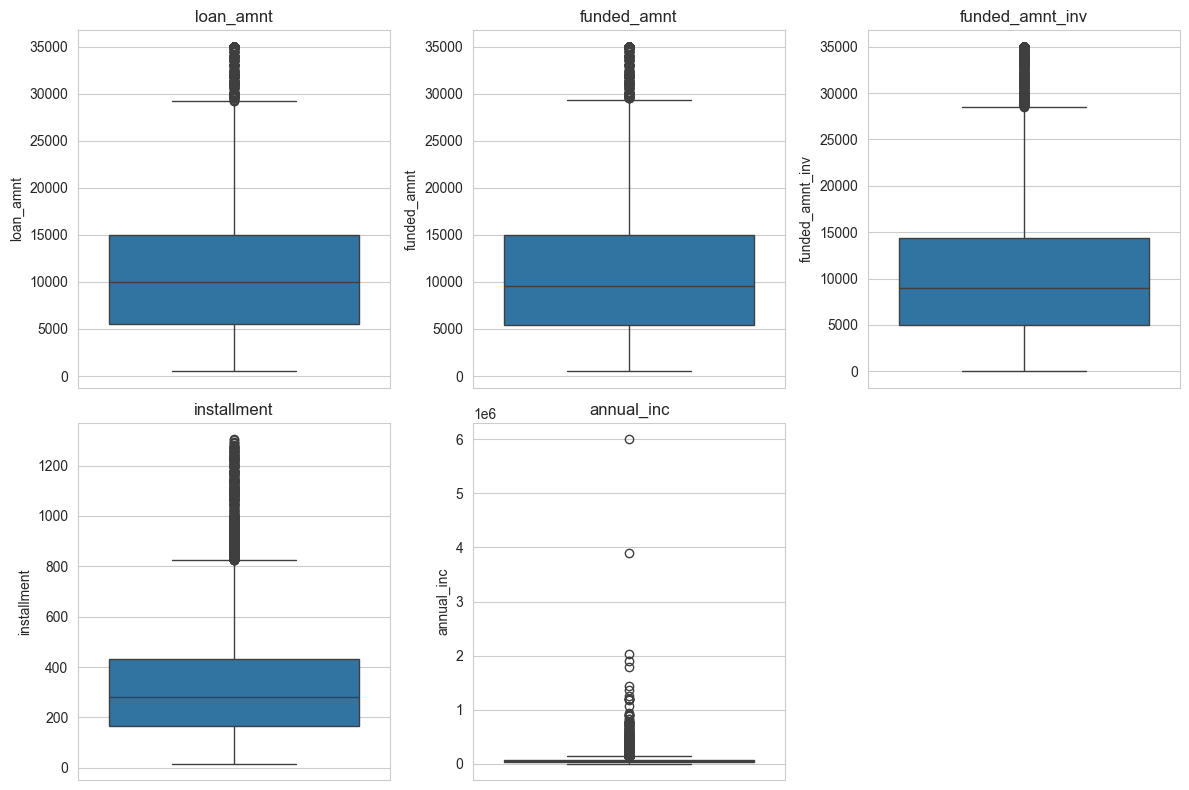

In [13]:

# List of columns to plot
columns_to_plot = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc']

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 8))  # Adjust the size as necessary

# Create a boxplot for each specified column
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as necessary
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()


#### * Conclusion: From Box plot, we can observe the outliers which can be cleaned

## Data Cleaning and Manipulation:

#### a) Cleaning data with null columns


In [14]:
df.dropna(axis=1, how='all', inplace=True)


In [15]:
df.shape

(39717, 57)

#### * Conclusion: 54 columns were removed and total column size is reduced to 57

#### b) Cleaning Unique or Single valued columns as they don't contribute for analysis

In [16]:
print("Columns to be dropped:",columns_with_one_unique_values)

Columns to be dropped: ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [17]:
df.drop(columns=columns_with_one_unique_values, inplace=True)

In [18]:
df.shape

(39717, 48)

#### * Conclusion: 9 single valued columns were dropped and total column size reduced to 48

#### c) Dropping columns with fewer data:



In [19]:
print("Columns to be dropped:",missing_gt_50)

Columns to be dropped: mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64


In [20]:

columns_to_drop =missing_gt_50.index.tolist()


In [21]:
df.drop(columns=columns_to_drop, inplace=True)

In [22]:
df.shape

(39717, 45)

#### * Conclusion: 3 columns were dropped which were having more than 90% of missing values and number of columns reduced to 45

### d) Drop columns which do not contribute to analysis


In [23]:
# displaying all the object type columns
object_columns_df = df.select_dtypes(include=['object'])
print(object_columns_df.head())


         term int_rate grade sub_grade                 emp_title emp_length  \
0   36 months   10.65%     B        B2                       NaN  10+ years   
1   60 months   15.27%     C        C4                     Ryder   < 1 year   
2   36 months   15.96%     C        C5                       NaN  10+ years   
3   36 months   13.49%     C        C1       AIR RESOURCES BOARD  10+ years   
4   60 months   12.69%     B        B5  University Medical Group     1 year   

  home_ownership verification_status issue_d  loan_status  \
0           RENT            Verified  Dec-11   Fully Paid   
1           RENT     Source Verified  Dec-11  Charged Off   
2           RENT        Not Verified  Dec-11   Fully Paid   
3           RENT     Source Verified  Dec-11   Fully Paid   
4           RENT     Source Verified  Dec-11      Current   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.a

In [24]:
# List of columns  considering for removal
columns_to_drop = ['member_id', 'id', 'url', 'desc','zip_code', 'out_prncp','out_prncp_inv', 'title','emp_title']

# Display the first few rows from these columns to cinfirm before dropping
print(df[columns_to_drop].head())

   member_id       id                                                url  \
0    1296599  1077501  https://lendingclub.com/browse/loanDetail.acti...   
1    1314167  1077430  https://lendingclub.com/browse/loanDetail.acti...   
2    1313524  1077175  https://lendingclub.com/browse/loanDetail.acti...   
3    1277178  1076863  https://lendingclub.com/browse/loanDetail.acti...   
4    1311748  1075358  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc zip_code  out_prncp  \
0    Borrower added on 12/22/11 > I need to upgra...    860xx       0.00   
1    Borrower added on 12/22/11 > I plan to use t...    309xx       0.00   
2                                                NaN    606xx       0.00   
3    Borrower added on 12/21/11 > to pay for prop...    917xx       0.00   
4    Borrower added on 12/21/11 > I plan on combi...    972xx     524.06   

   out_prncp_inv                 title                 emp_title  
0           0.00   

In [25]:
df.drop(columns=columns_to_drop, inplace=True)

In [26]:
df.shape

(39717, 36)

#### * Conclusion: 9 columns were dropped which were not useful for analysis and now the number of columns were reduced to 36

### e) Convert  columns having percentages as interests data type from object to floating type

In [27]:
# View the first few rows to verify the conversion
print(df[['int_rate', 'revol_util']].head())

  int_rate revol_util
0   10.65%     83.70%
1   15.27%      9.40%
2   15.96%     98.50%
3   13.49%        21%
4   12.69%     53.90%


In [28]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

In [29]:
#verify
print(df[['int_rate', 'revol_util']].head())

   int_rate  revol_util
0     10.65        83.7
1     15.27         9.4
2     15.96        98.5
3     13.49        21.0
4     12.69        53.9


#### * Conclusion: 2 columns which were percentage columns were converted into floating type

### f) Dropping Data which are not relevant

In [30]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


In [31]:
df.shape

(39717, 36)

#### Note: As per problem statement, EDA analysis will be on customers who have paid the loan [Fully Paid] or Defaulted [Charged Off], so people who are currently paying emi's is not relevant, So dropping those records makes sense


In [32]:
df = df[df['loan_status'] != 'Current']

In [33]:
df.shape

(38577, 36)

#### * Conclusion: 1140 records were in current status which are deleted

In [34]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### g) Handle missing values in columns

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  float64
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose                  38

In [36]:

missing_percentage = df.isnull().mean() * 100

missing_percentage_gt_zero = missing_percentage[missing_percentage > 0]

print(missing_percentage_gt_zero)


emp_length              2.677761
revol_util              0.129611
last_pymnt_d            0.184047
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64


In [37]:
columns_of_nullvalues = ['emp_length','revol_util','last_pymnt_d','last_credit_pull_d']

print(df[columns_of_nullvalues].head())

  emp_length  revol_util last_pymnt_d last_credit_pull_d
0  10+ years        83.7       Jan-15             May-16
1   < 1 year         9.4       Apr-13             Sep-13
2  10+ years        98.5       Jun-14             May-16
3  10+ years        21.0       Jan-15             Apr-16
5    3 years        28.3       Jan-15             Jan-16


In [38]:
# Replacing missing value in emp_length column as 0 year
df['emp_length'] = df['emp_length'].fillna('0 year')

In [40]:
#Replacing missing percentage as zero value 
df['revol_util'] = df['revol_util'].fillna(0)

In [41]:
#Replacing missing value as zero value
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [42]:
### Keeping last_pymnnt_d and last_credit_pull_d columns as it is because it is a valid use case

In [43]:
missing_percentage = df.isnull().mean() * 100

missing_percentage_gt_zero = missing_percentage[missing_percentage > 0]

print(missing_percentage_gt_zero)

last_pymnt_d          0.184047
last_credit_pull_d    0.005184
dtype: float64


#### * Conclusion: 
-> Replaced missing value in emp_length column as 0 year


-> Replaced missing values in float type columns revol_util,pub_rec_bankruptcies as zero value 

-> Keeping last_pymnnt_d and last_credit_pull_d columns as it is because it is a valid use case

### h) Handling outliers

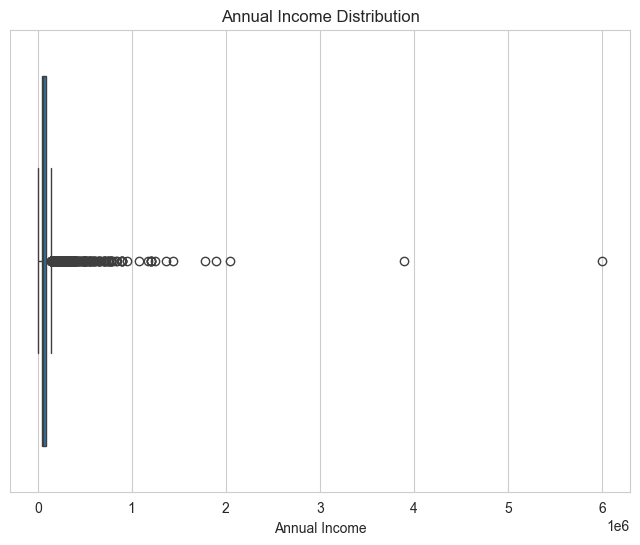

In [44]:
#Plotting boxplot for annual_inc


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['annual_inc'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()

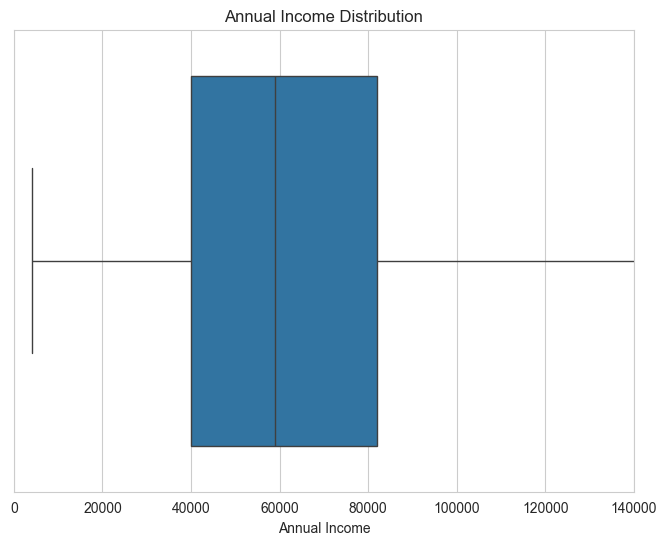

In [45]:
# considering only till 95 percentile to remove outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['annual_inc'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.xlim(0, df['annual_inc'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

#### * Conclusion: Deleting outliers greater than 95th quantile is the solution for annual_inc column as it is clear from above graph

In [46]:
quantile_95 = df['annual_inc'].quantile(0.95)
df = df[df['annual_inc'] <= quantile_95]

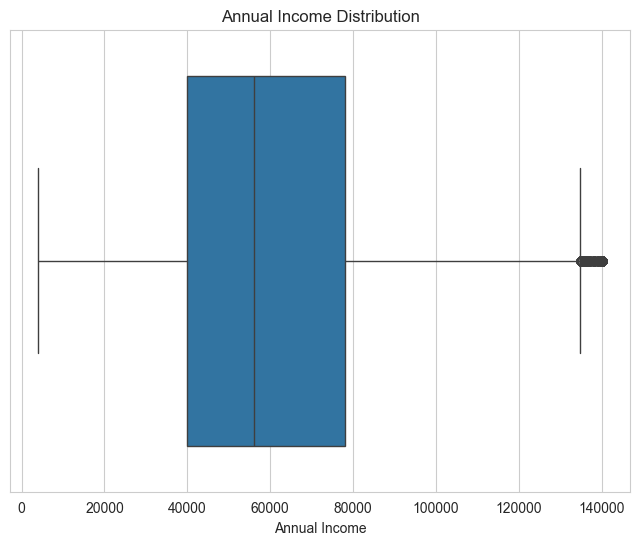

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['annual_inc'])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.show()

## Data Analysis:

### a) Analyzing Data against Loan Status: 'Charged Off' for Numerical Columns



In [48]:
df_defaulters = df[df['loan_status'] == 'Charged Off']

In [62]:
# Finding numerical columns in the data set:

numerical_cols = df_defaulters.select_dtypes(include=['float64', 'int64'])
numerical_cols.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
int_rate                   float64
installment                float64
annual_inc                 float64
dti                        float64
delinq_2yrs                  int64
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
pub_rec_bankruptcies       float64
dtype: object

In [61]:
selected_numerical_columns = ['loan_amnt','funded_amnt','int_rate','installment','annual_inc','dti','total_pymnt','recoveries','collection_recovery_fee','pub_rec_bankruptcies']


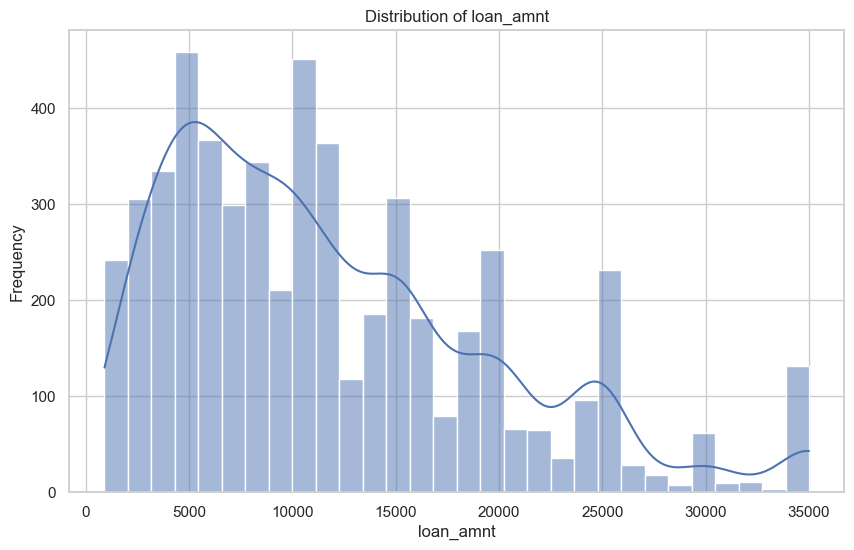

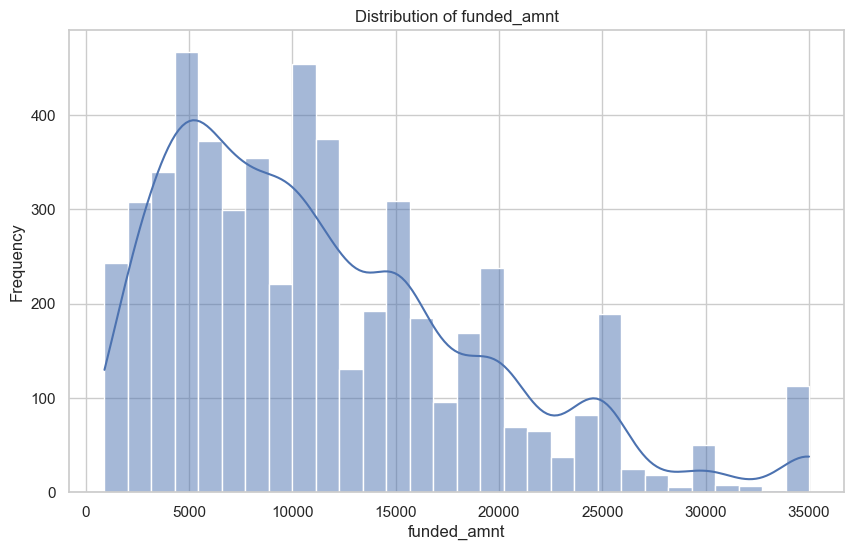

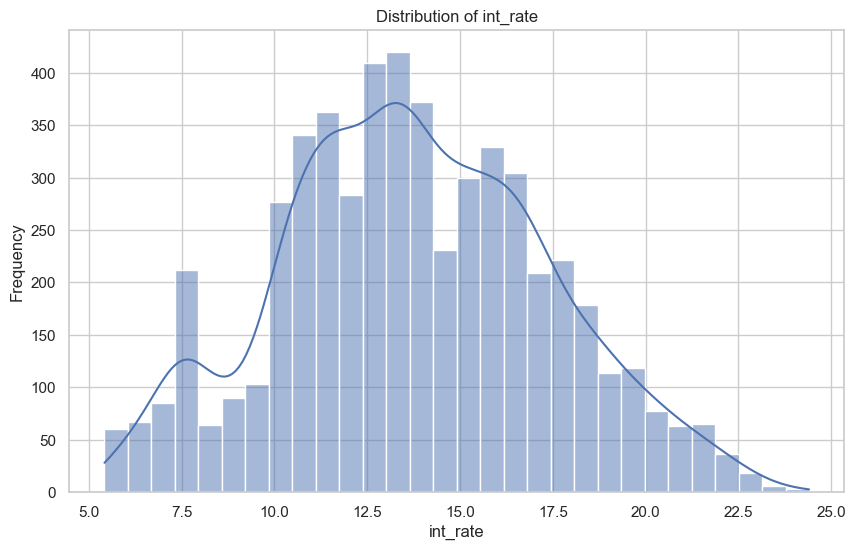

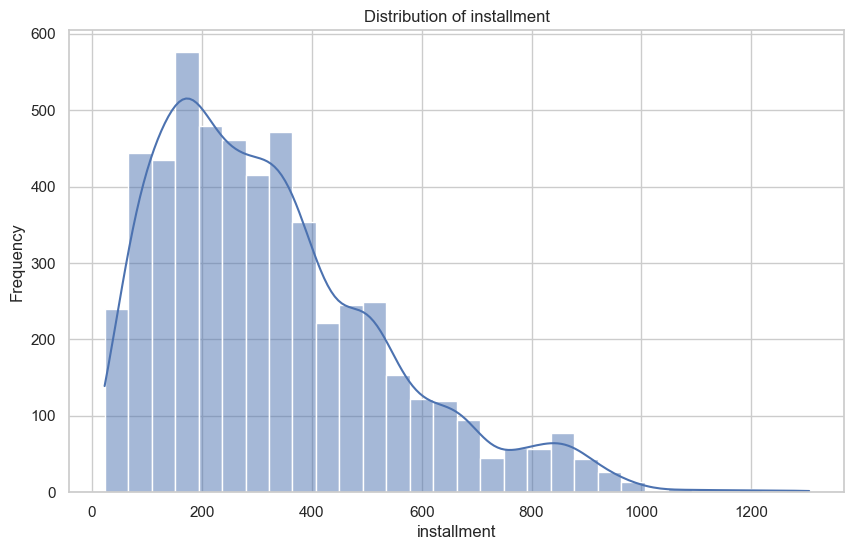

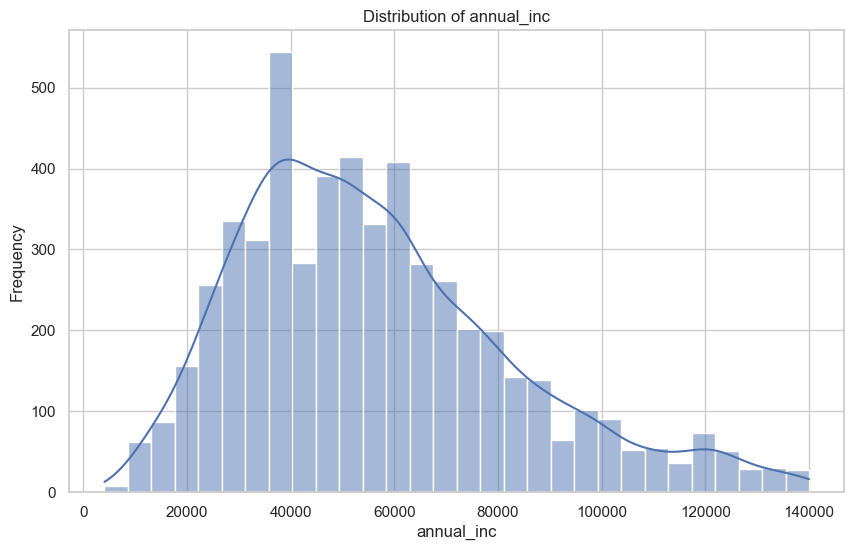

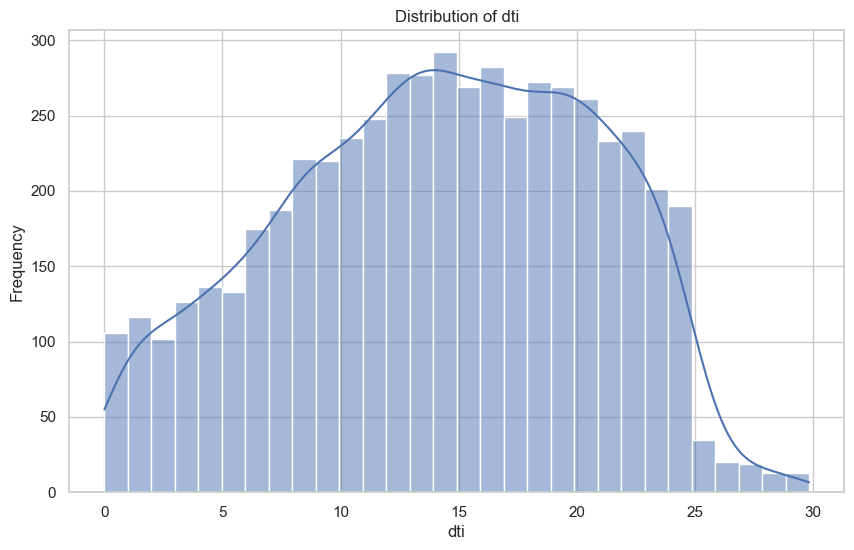

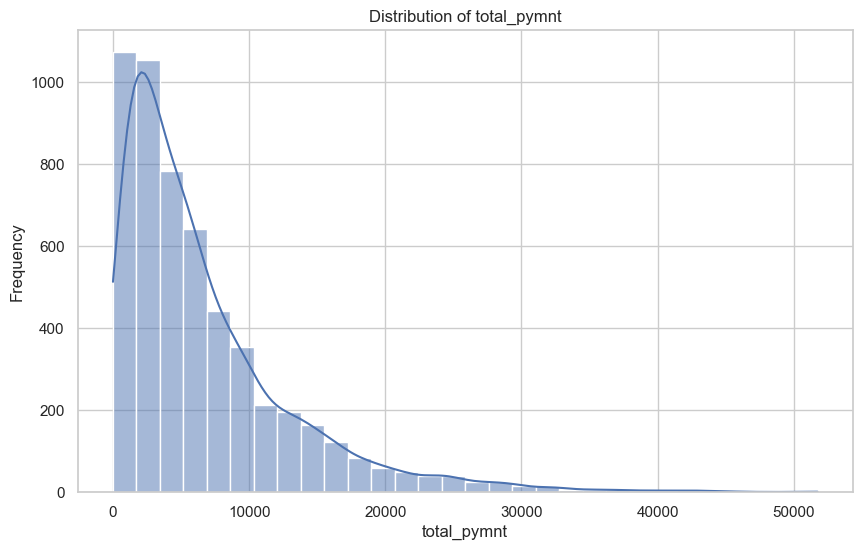

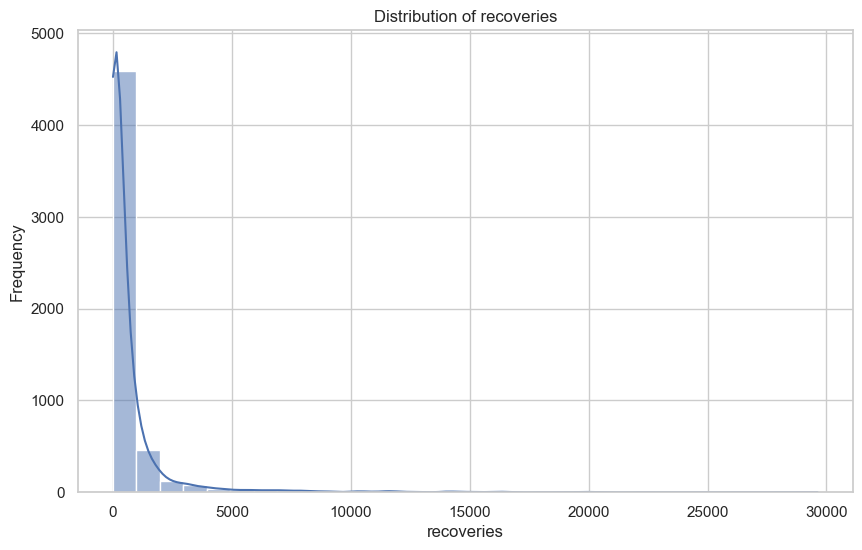

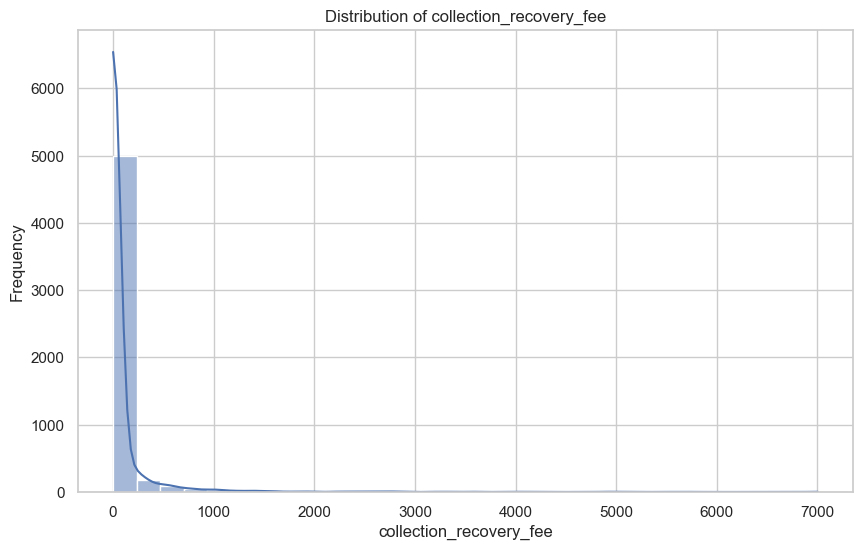

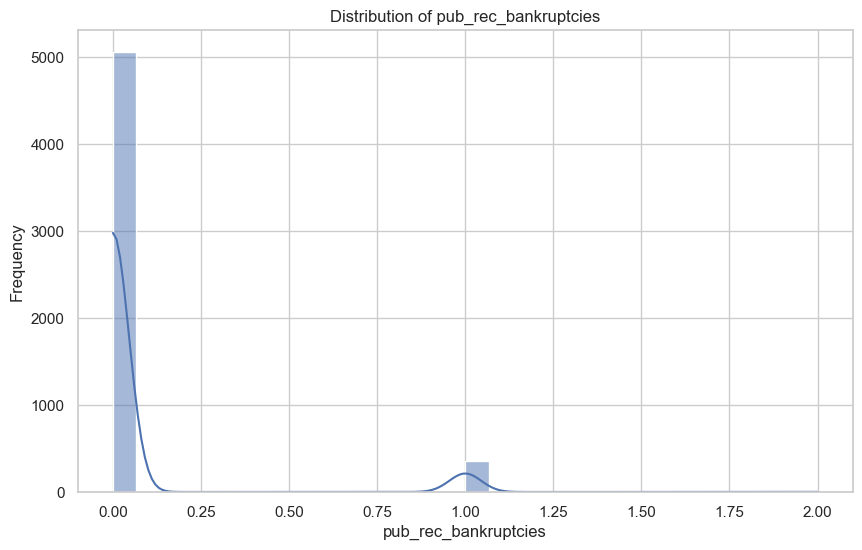

In [63]:
### Plotting histogram for all numerical columns for Loan Defaulters

# Set the aesthetics for the plots
sns.set(style="whitegrid")

for col in selected_numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_defaulters[col], kde=True, bins=30)  # KDE (Kernel Density Estimate) adds a density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


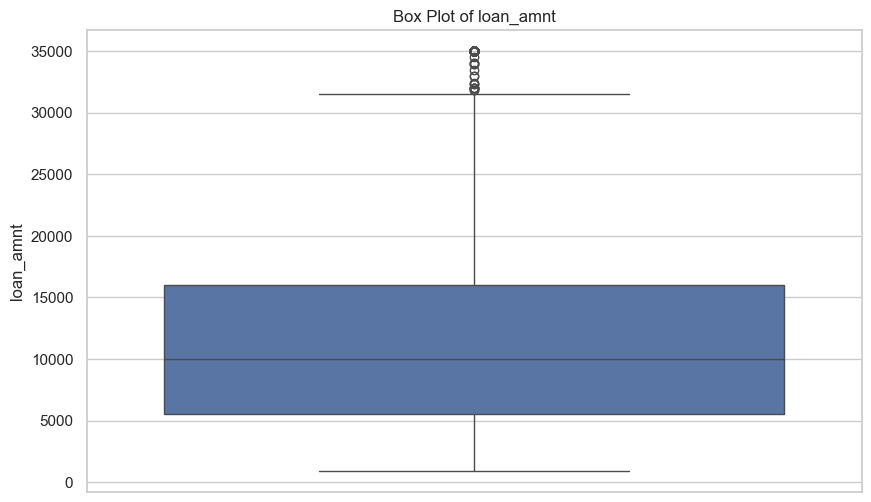

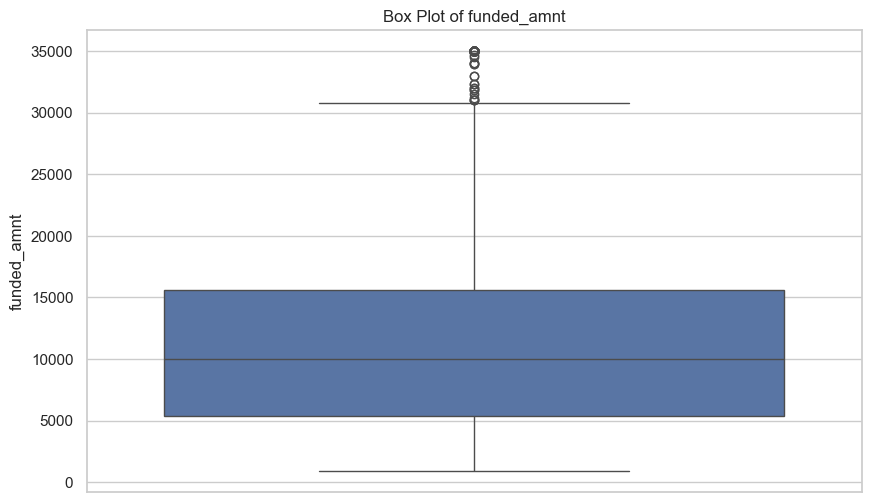

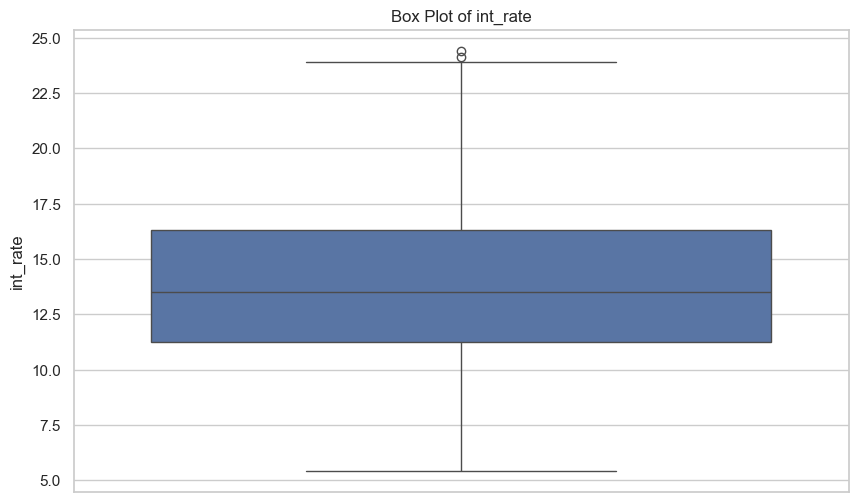

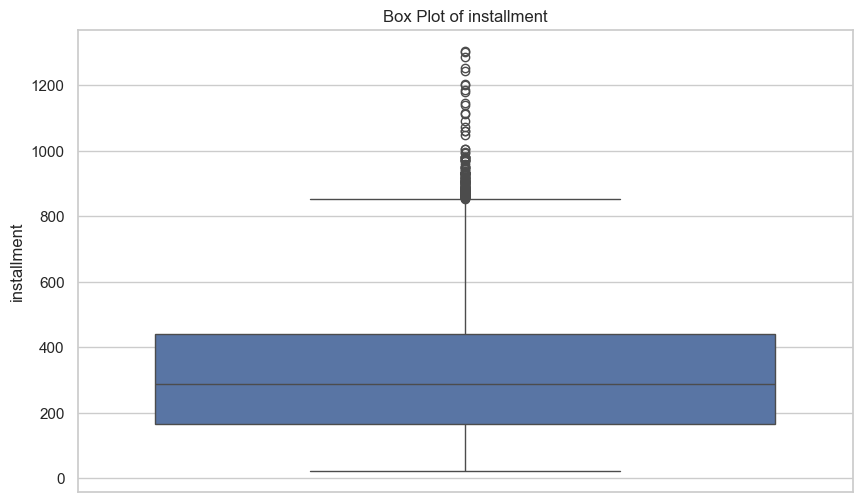

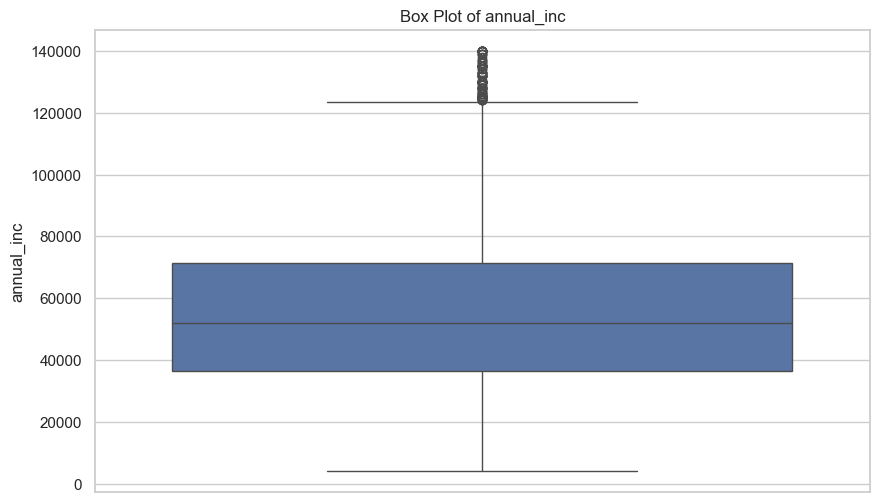

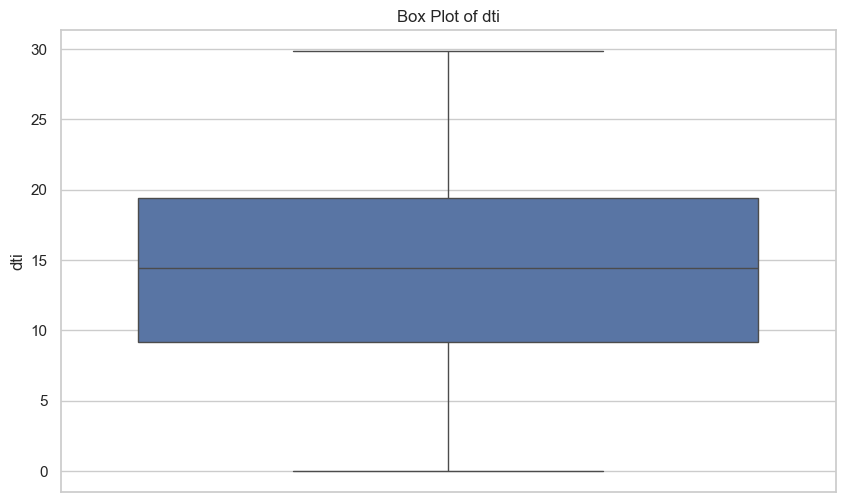

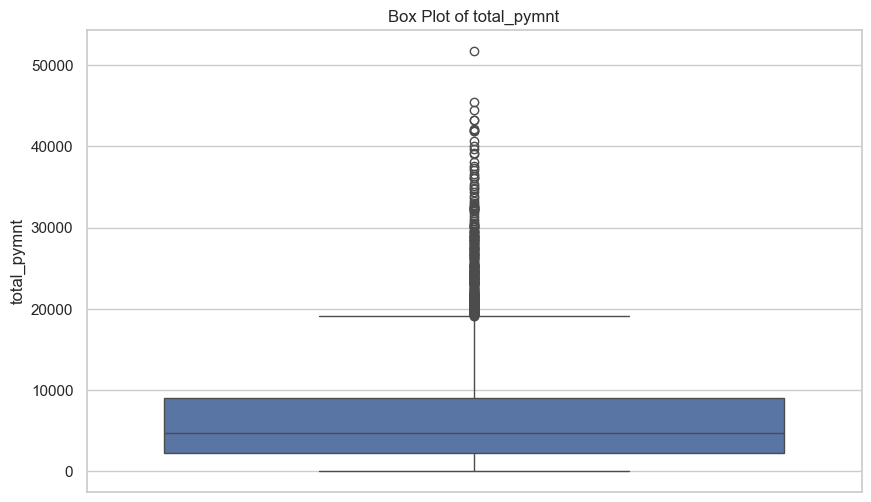

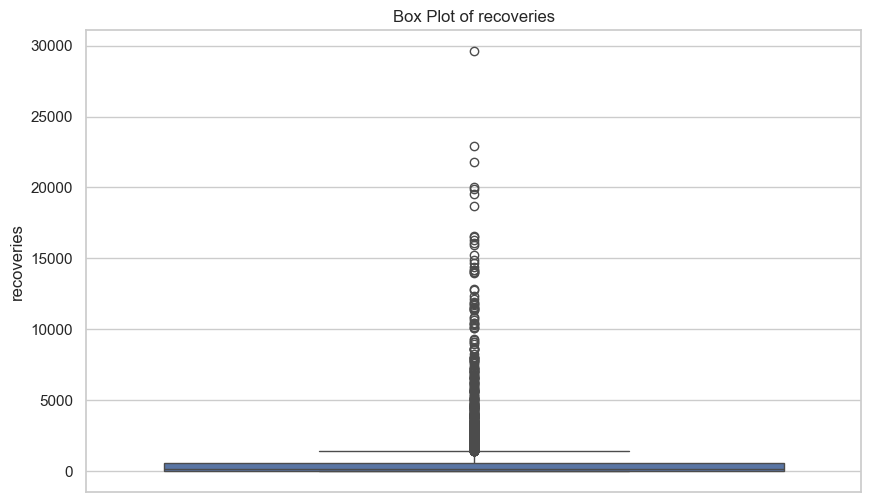

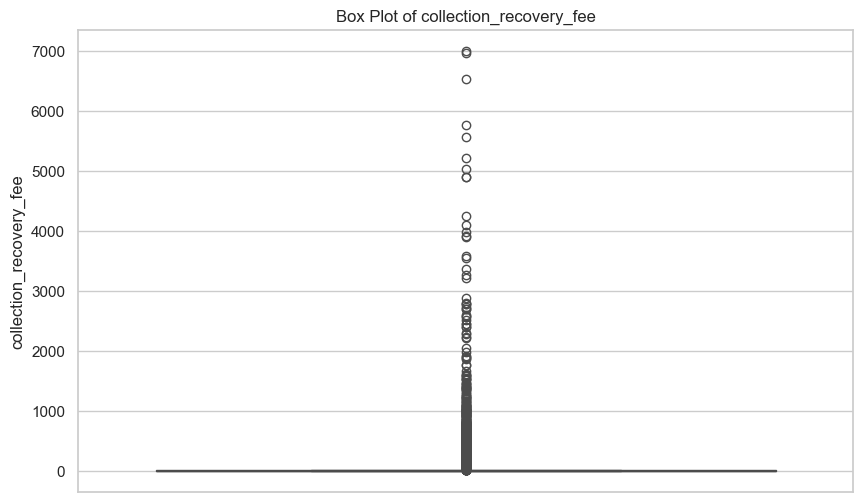

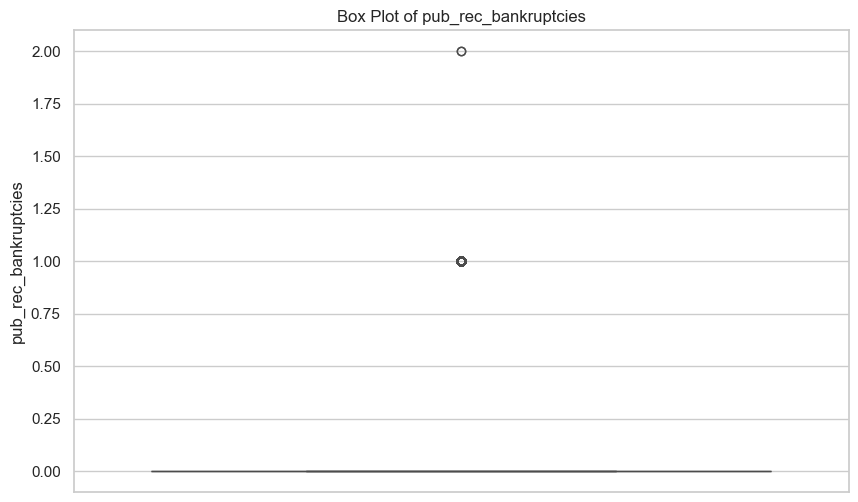

In [64]:
# Plotting box plot on selected numerical columns
# Set the aesthetics for the plots
sns.set(style="whitegrid")

for col in selected_numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_defaulters[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()


### * Conclusion:

Person will more likely to be a defaulter on following ranges:

1) Loan Amount is from 2000 to 12000

2) Funded Amount is from 3000 to 11500

3) Interest rate is higher than 10

4) Number of installments is less than 600

5) Annual Income in the range 30000 to 60000

6) DTI is greater than 10

7) Total Payment is less than 10000

8) Number of recoveries is less than 1000

9) Collection Recovery fee is less than 200

10) Public record bankrupties is less than 0.15

### b) Analyzing Data against Loan Status: 'Charged Off' for Categorical Columns¶

In [65]:
# Finding the categorical columns

categorical_cols = df_defaulters.select_dtypes(include=['object', 'category'])

categorical_cols.dtypes

term                   object
grade                  object
sub_grade              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
purpose                object
addr_state             object
earliest_cr_line       object
last_pymnt_d           object
last_credit_pull_d     object
dtype: object

In [67]:
selected_categorical_columns = ['term','grade','emp_length','home_ownership','verification_status','purpose','addr_state']


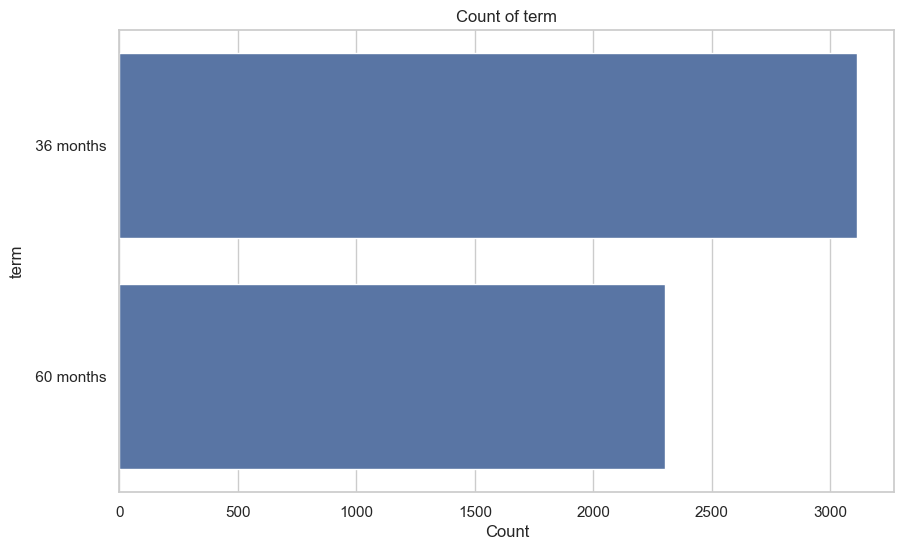

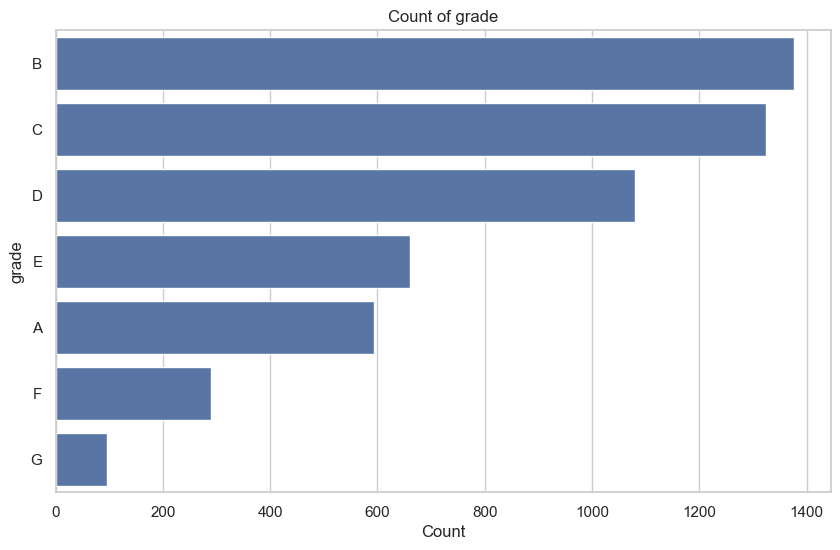

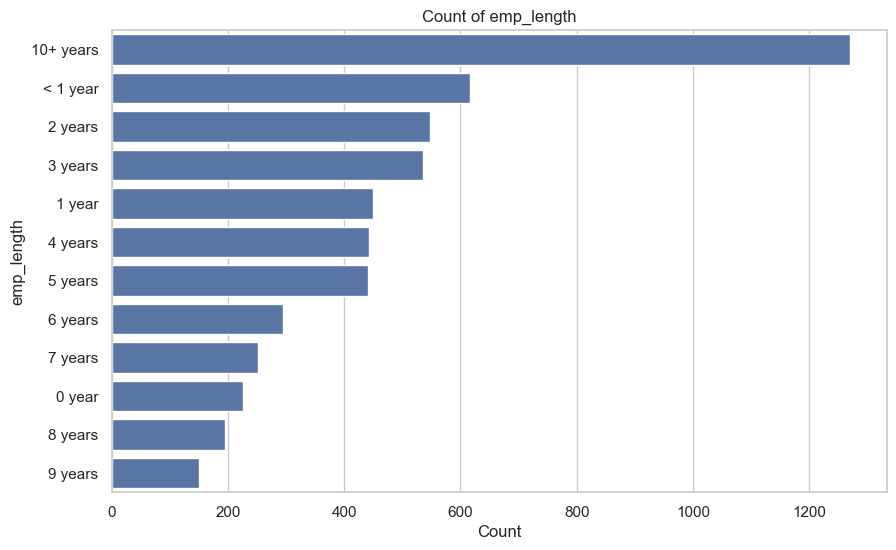

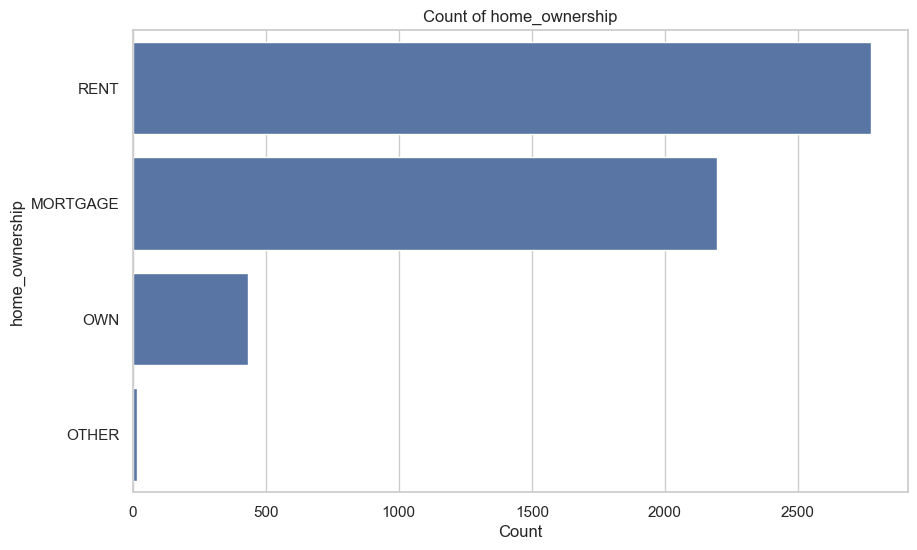

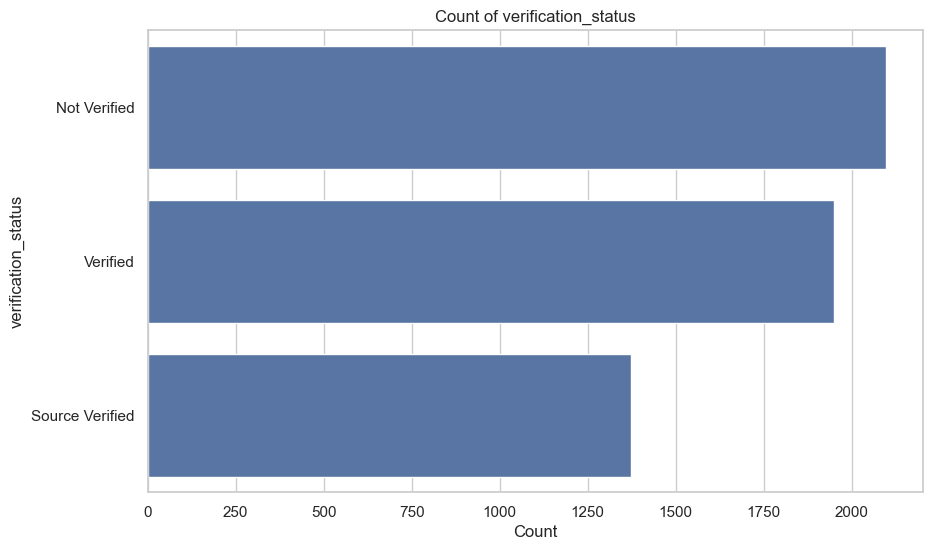

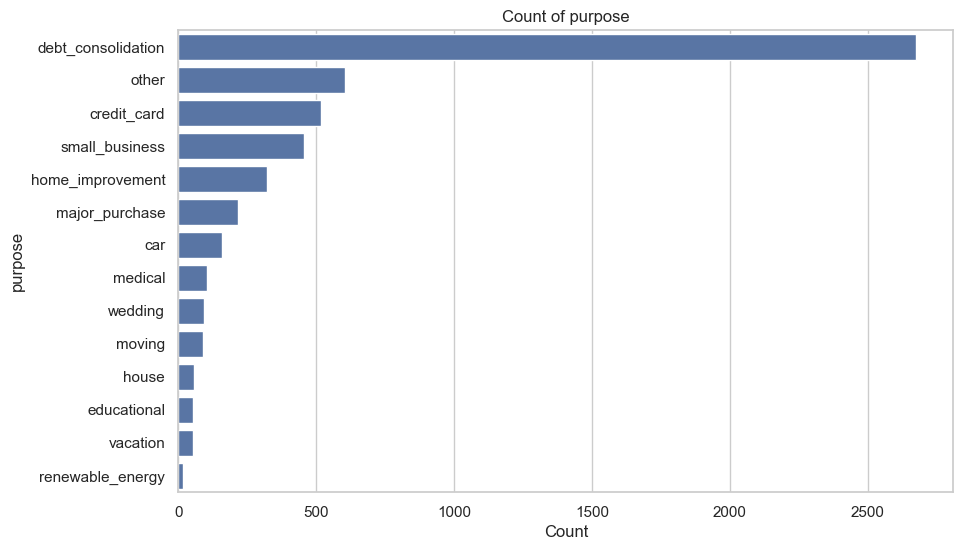

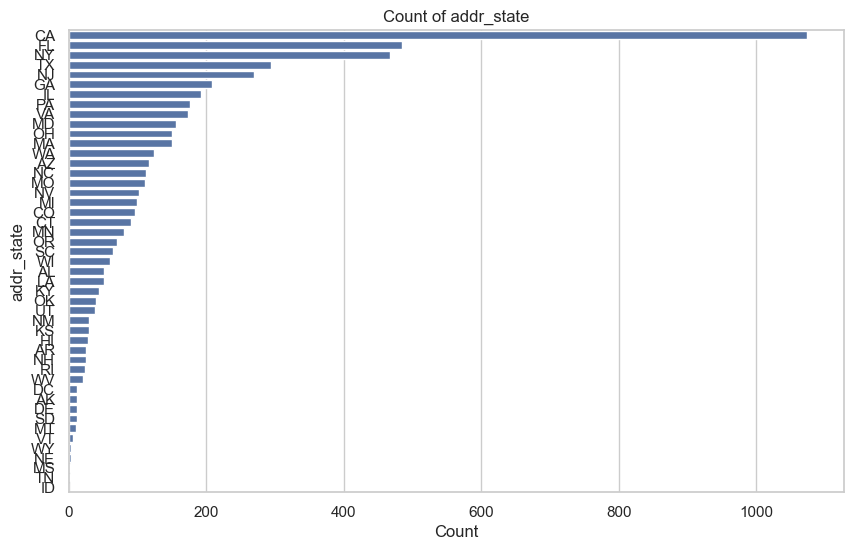

In [68]:
## Plotting countplot on Categorical columns

# Set the aesthetics for the plots
sns.set(style="whitegrid")



for col in selected_categorical_columns:
    
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df_defaulters, order = df_defaulters[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


### Conclusion: 

A person is more likely to default under following categories:

1) Term is 36 months

2) Grade is B, C and D

3) Employment length is greater than 10 years

4) Home ownership is Rent or Mortgage

5) Verification status is not verified

6) Purpose is debt consolidation

7) Address is in CA, FL, NY

### c) Multivariate analysis:


In [53]:
# Convert loan_status to 0 for "Fully Paid" and 1 for "Charged Off"
df['loan_status_numeric'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)


In [54]:
# Exclude Non-numeric Columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])


In [55]:
# Calculate correlation matrix
corr_matrix = df_numeric.corr()




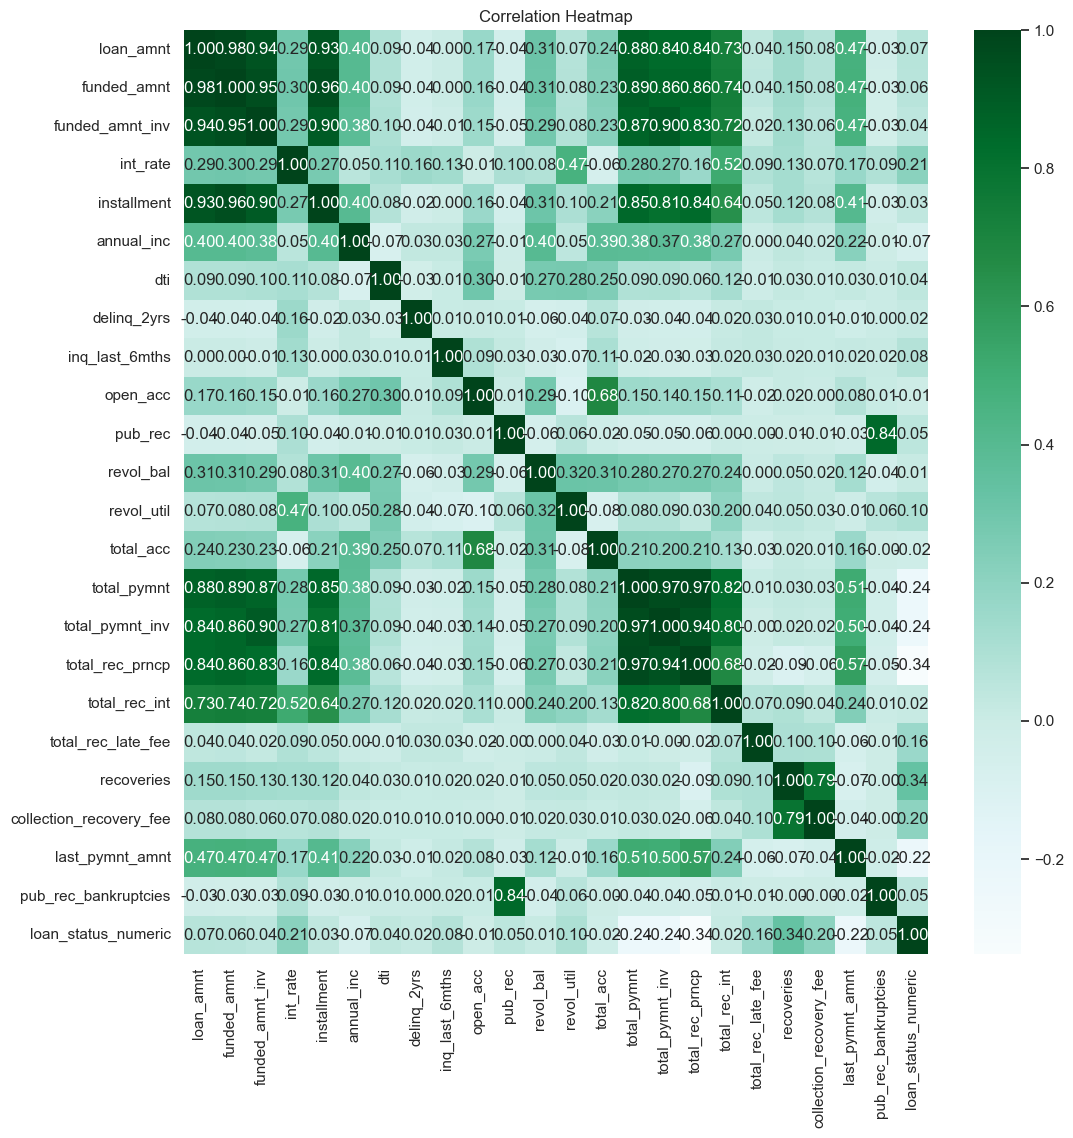

In [56]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='BuGn', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})
plt.show()

#### Conclusion from the heat map: int_rate, recoveries & collection_recovery_fee has higher positive correlation 
1) it looks like higher int_rate (0.21) can lead to high defaulters

2) higher recoveries (0.20) can lead to high defaulters

3) higher collection_recovery_fee (0.20) can lead to high defaulters

4) positive correlation can also be found on funded_amnt, 
funded_amnt_inv, installment, dti, delinq_2yrs, inq_last_6mnths, pub_rec, revol_bal, revol_util, total_rec_int, total_rec_late_fee, pub_rec_bankruptcies